In [1]:
import math
from scipy import stats
from scipy.stats import norm
import numpy as np
from scipy.io import loadmat
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from functions1 import *
import pandas as pd

In [2]:
"""
    Import data from data1.mat and data2.mat
"""
D1 = loadmat('data1.mat')['D']
data2 = loadmat('data2.mat')
D2 = data2['D2']
adj2 = data2['A2']  # adjacency matrix of D2 for sanity check
#nx.draw(nx.DiGraph(adj2), with_labels=True)

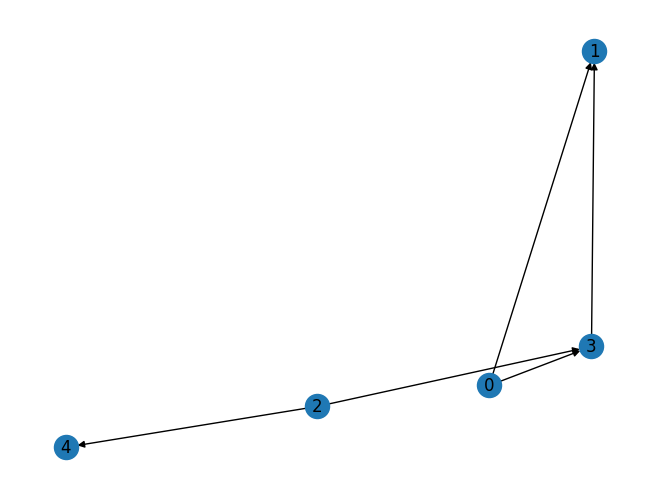

In [3]:
#create graph D1

adj1 = np.array([[0, 1, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 1, 0, 0, 0],[0, 0, 0, 0, 0] ]) #order is x y w z s
node_labels = {0 : 'x', 1: 'y', 2: 'w', 3: 'z', 4: 's'}
G1 = nx.DiGraph(adj1)
#G1 = nx.relabel_nodes(G1,node_labels)
nx.draw(G1 ,with_labels=True)

In [5]:
# we test  how the functin d_sep and ci_test works

print(d_sep(G1, {0}, {1}, {2,3}))
print(ci_test(D1, 0, 1, [2,3], 0.05))

print(d_sep(G1, {0}, {4}, {2}))
print(ci_test(D1, 0, 4, [2], 0.05))

print(d_sep(G1, {1}, {2}, {3}))
print(ci_test(D1, 1, 2, [3], 0.05))

False
False
True
False
False
False


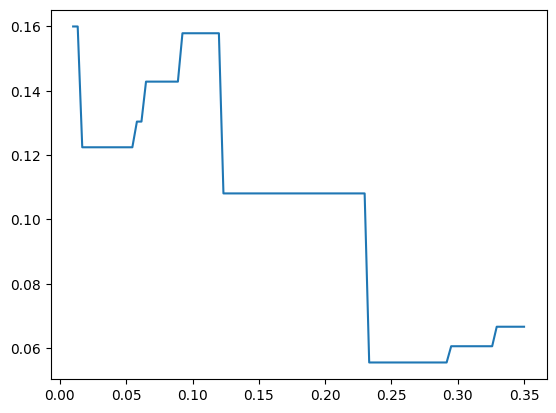

In [6]:
#parameter tuning

lis_alpha = np.linspace(0.01,0.35,100)
nodes = [0,1,2,3,4]

alpha, F1, precision, recall = tune_alpha(nodes, lis_alpha, G1, D1)

plt.plot(lis_alpha, F1)
plt.show()

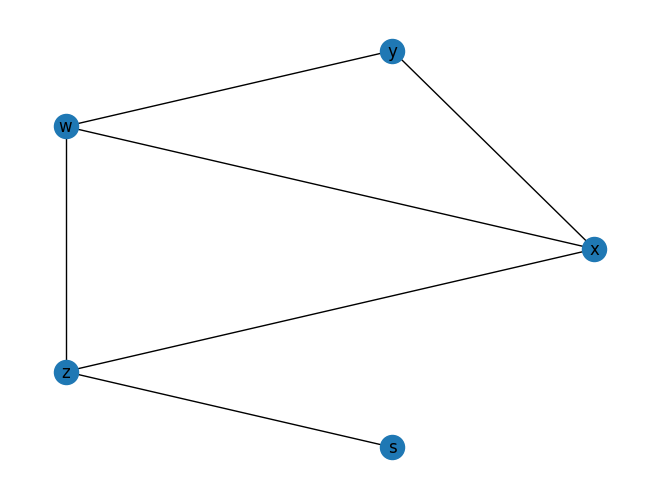

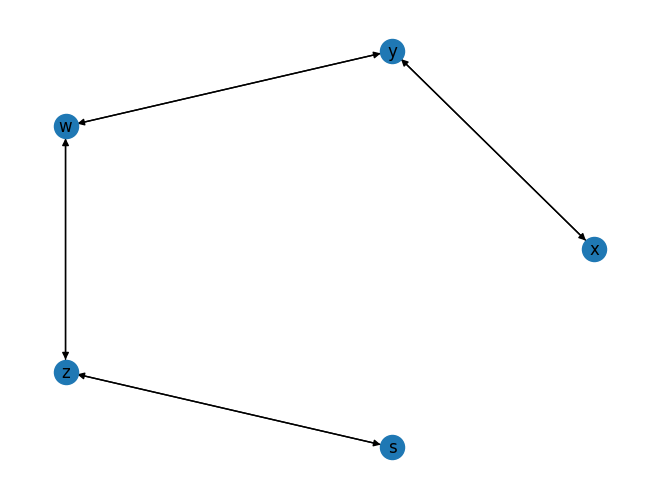

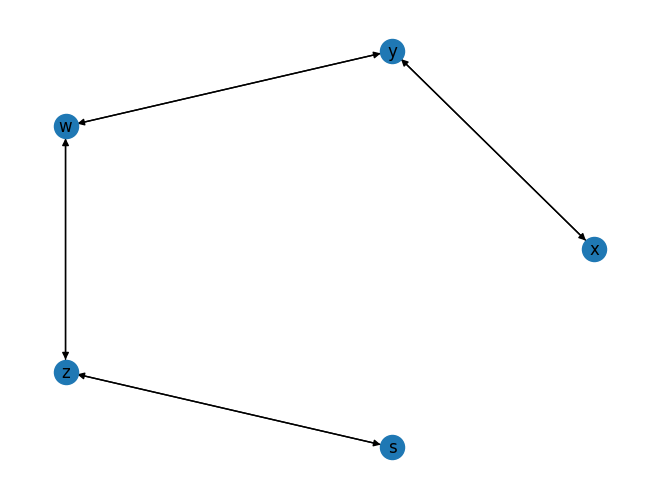

In [12]:
# Apply our algorithm to the benchmark graph

G_1, M = GS_step1(D1, alpha)
G_2, A = GS_step2(D1, alpha, G_1.copy(), M)
G_3 = GS_step3(G_2.copy(), A)

G_1 = nx.relabel_nodes(G_1,node_labels)
G_2 = nx.relabel_nodes(G_2,node_labels)
G_3 = nx.relabel_nodes(G_3,node_labels)

nx.draw_circular(G_1 ,with_labels = True)
plt.show()
nx.draw_circular(G_2 ,with_labels = True)
plt.show()
nx.draw_circular(G_3 ,with_labels = True)

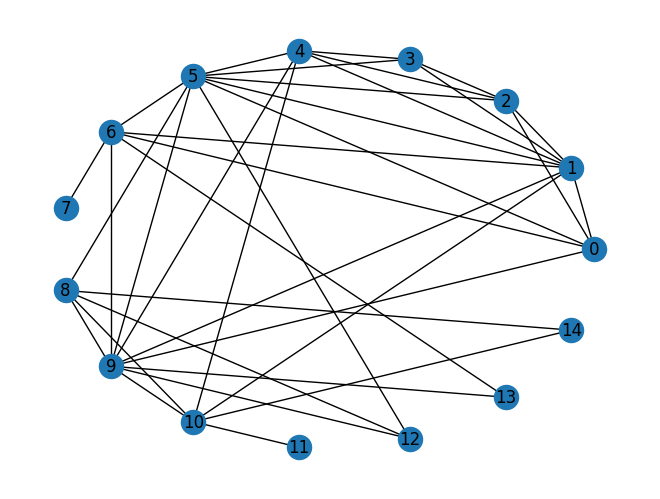

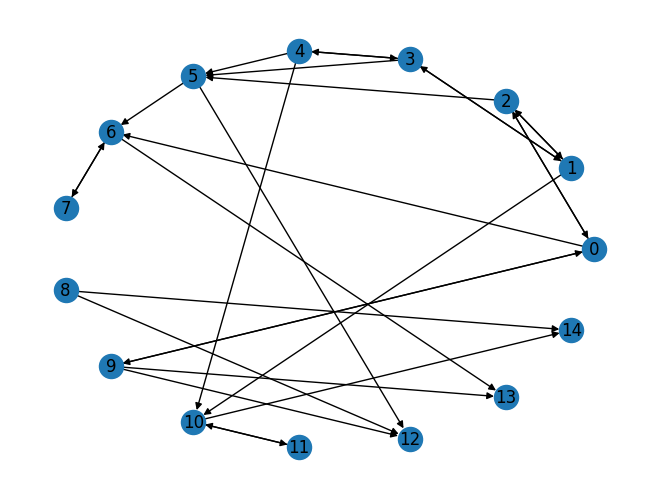

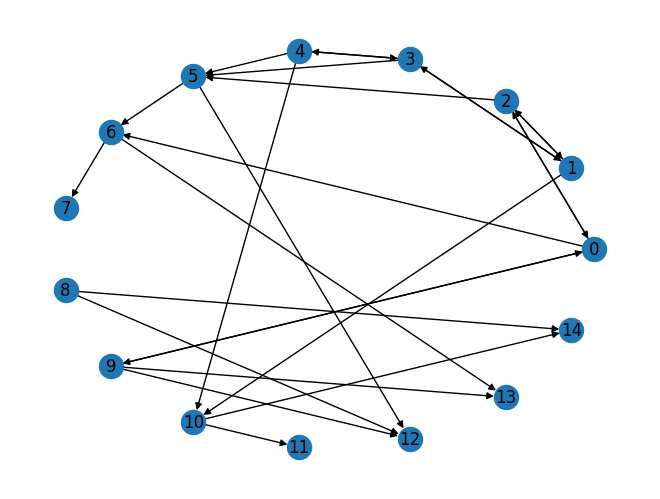

In [13]:
# Apply our algorithm to the test graph

G_1, M = GS_step1(D2, alpha)
G_2, A = GS_step2(D2, alpha, G_1.copy(), M)
G_3 = GS_step3(G_2.copy(), A)

#G_1 = nx.relabel_nodes(G_1,node_labels)
#G_2 = nx.relabel_nodes(G_2,node_labels)
#G_3 = nx.relabel_nodes(G_3,node_labels)

nx.draw_circular(G_1 ,with_labels = True)
plt.show()
nx.draw_circular(G_2 ,with_labels = True)
plt.show()
nx.draw_circular(G_3 ,with_labels = True)

In [59]:
#shuffle columns

D1_shuffled = pd.DataFrame(D1)

shuffled_columns = D1_shuffled.columns.to_list()
np.random.shuffle(shuffled_columns)
D1_shuffled = D1_shuffled[shuffled_columns]

D1_shuffled

D1_shuffled = D1_shuffled.values

print(D1,"\n\n\n" ,D1_shuffled)

[[ -0.27340238  -1.36311392   1.34497606   0.41780701   1.15399318]
 [  0.41562881   3.6000642   -1.44534388  -0.30362213  -0.03839153]
 [ -1.64219957 -12.28666659   9.46515557   1.24903962   1.40327344]
 ...
 [  0.41363088   3.03704681  -0.26613534  -0.17640465   0.82366147]
 [  0.39401957   3.95399664  -2.6522568   -0.64337831   0.22293262]
 [  0.09354709   1.01503277   2.05546702   0.78143161   0.23053696]] 


 [[  0.41780701   1.34497606  -1.36311392  -0.27340238   1.15399318]
 [ -0.30362213  -1.44534388   3.6000642    0.41562881  -0.03839153]
 [  1.24903962   9.46515557 -12.28666659  -1.64219957   1.40327344]
 ...
 [ -0.17640465  -0.26613534   3.03704681   0.41363088   0.82366147]
 [ -0.64337831  -2.6522568    3.95399664   0.39401957   0.22293262]
 [  0.78143161   2.05546702   1.01503277   0.09354709   0.23053696]]


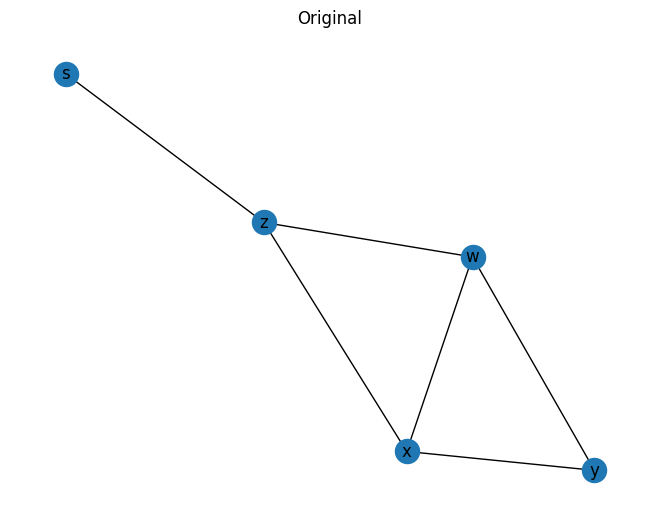

Text(0.5, 1.0, 'Shuffled')

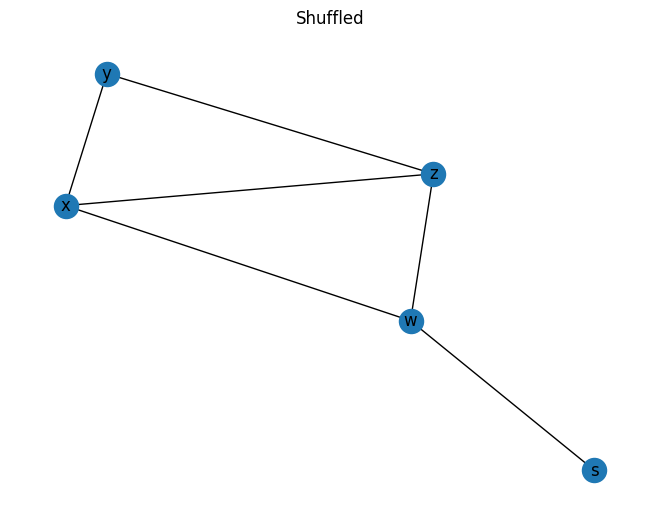

In [66]:
#plot the shuffled and the original graph

G, M = GS_step1(D1, alpha)
#G = GS_step2(D1, alpha, G, M)
node_labels = {0 : 'x', 1: 'y', 2: 'w', 3: 'z', 4: 's'}
G = nx.relabel_nodes(G,node_labels)
nx.draw(G ,with_labels = True)
plt.title("Original")
plt.show()

G1, M1 = GS_step1(D1_shuffled, alpha)
#G1 = GS_step2(D1_shuffled, alpha, G, M)
node_labels1 = {0 : 'w', 1: 'z', 2: 'y', 3: 'x', 4: 's'}
G1 = nx.relabel_nodes(G1,node_labels1)
nx.draw(G1 ,with_labels = True)
plt.title("Shuffled")
